In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path=r'C:\Users\chinn\Documents\Data_files\Visadataset.csv'
visa_df=pd.read_csv(file_path)

cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(include='object').columns

In [2]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [3]:
num

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [4]:
# Read the continent column
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [5]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

- there are total 25480 applicants are there

- in that 25480 applicants 17018 applicants got the visa

- 8462 applicants did not get the visa

- also there are 16861 applixants are applied for visa from asia

- we want to know how many applicants from asia got certified

- and how many applicants from aisa got denied

In [6]:
# step-1: select the continent data
# step-2: continent data == "Asia" it is con1
# step-3: select the case status data
# step-4: case status data == 'certified' is con2
# step-5: con=con1&con2
# step-6: apply main df on con get the len

# banking finance

In [7]:
visa_df['continent']
con1 = visa_df['continent']=='Asia'
visa_df['case_status']
con2 = visa_df['case_status']=='Certified'
con = con1 & con2
len(visa_df[con])   

11012

In [8]:
# from different countries how many ppl are certified
values=visa_df['continent'].unique()
for i in values:
    con1 = visa_df['continent']==i
    con2 = visa_df['case_status']=='Certified'
    con = con1 & con2
    print(len(visa_df[con]))

11012
397
2037
2957
493
122


In [9]:
lables=visa_df['continent'].unique()
# certified count list=[]
# denied count list=[]
for i in lables:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='certified'
    # con3= denied condition
    cert_con= con1 & con2
    # den_con=con1 & con3
    print(len(visa_df[cert_con]))
    # append (len(visa_df[den_con]))

0
0
0
0
0
0


In [10]:
lables=visa_df['continent'].unique()
cert_count=[]
den_count=[]
for i in values:
    con1 = visa_df['continent']==i
    con2 = visa_df['case_status']=='Certified'
    con3 = visa_df['case_status']=='Denied'
    cert_con = con1 & con2
    den_con = con1 & con3
    cert_count.append(len(visa_df[cert_con]))
    den_count.append(len(visa_df[den_con]))
cols=sorted(visa_df['case_status'].unique())
print(cols)
pd.DataFrame(zip(cert_count,den_count),
             columns=cols,index=lables)

['Certified', 'Denied']


,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**cross tab**

In [11]:
# pd.crosstab(<index>,<columns>)
col1=visa_df['continent']
col2=visa_df['case_status']
r1=pd.crosstab(col1,col2)
r1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

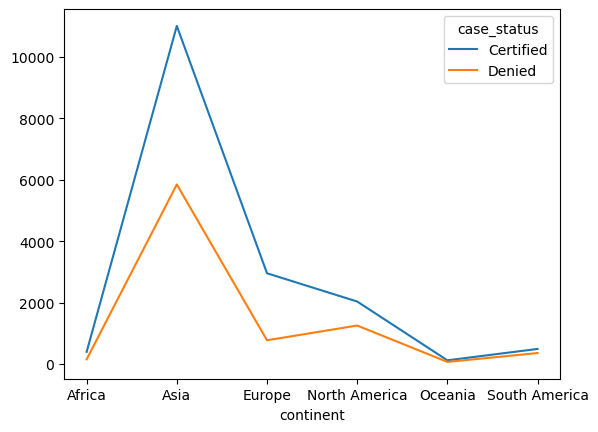

In [12]:
r1.plot()

<Axes: xlabel='continent'>

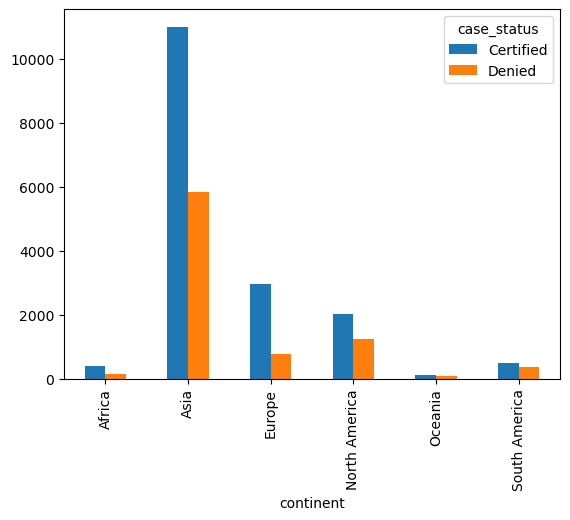

In [13]:
r1.plot(kind='bar')

**case status-continent-education_of_employee** 

In [14]:
# feom asia there 16k applicants for visa
#   in that 11k+ ppl got ertified
#       in that 11k ppl difeerent education applicants are available

# we want those information

In [15]:
# pd.crosstab(<index>,<columns>)
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
cols=[col2,col3]
pd.crosstab(col1,cols)

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

In [16]:
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
cols=[col3,col2]
r2=pd.crosstab(col1,cols)
r2

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

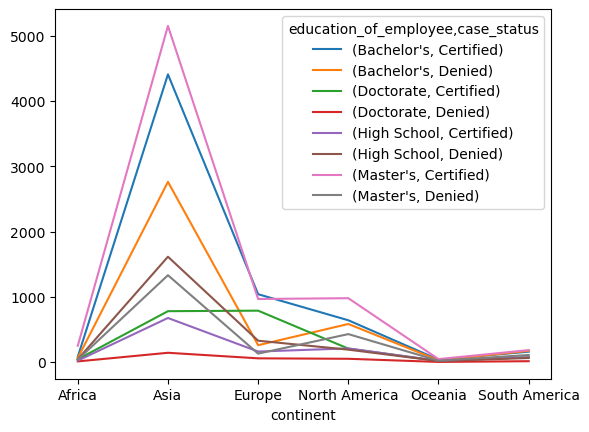

In [17]:
r2.plot()

**group by**

In [18]:
visa_df['education_of_employee'].value_counts()

education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

In [19]:
visa_df['prevailing_wage']
# wages are numerical values
# 25480 applicants are available
# different applicants having 

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [20]:
list(visa_df.groupby('education_of_employee'))

[("Bachelor's",
           case_id      continent education_of_employee has_job_experience  \
  2         EZYV03           Asia            Bachelor's                  N   
  3         EZYV04           Asia            Bachelor's                  N   
  6         EZYV07           Asia            Bachelor's                  N   
  7         EZYV08  North America            Bachelor's                  Y   
  8         EZYV09           Asia            Bachelor's                  N   
  ...          ...            ...                   ...                ...   
  25466  EZYV25467         Europe            Bachelor's                  Y   
  25468  EZYV25469           Asia            Bachelor's                  N   
  25473  EZYV25474           Asia            Bachelor's                  Y   
  25475  EZYV25476           Asia            Bachelor's                  Y   
  25479  EZYV25480           Asia            Bachelor's                  Y   
  
        requires_job_training  no_of_employee

In [21]:
visa_df.groupby('education_of_employee').count()

,case_id,continent,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
education_of_employee,,,,,,,,,,,
Bachelor's,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234
Doctorate,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192
High School,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420
Master's,9634,9634,9634,9634,9634,9634,9634,9634,9634,9634,9634


In [22]:
visa_df.groupby('education_of_employee').size()

education_of_employee
Bachelor's     10234
Doctorate       2192
High School     3420
Master's        9634
dtype: int64

In [23]:
visa_df.groupby('education_of_employee')['prevailing_wage']

In [24]:
visa_df['prevailing_wage'].mean()

np.float64(74455.81459209183)

In [25]:
visa_df[visa_df['education_of_employee']=="Bachelor's"]['prevailing_wage'].mean()

np.float64(73405.44373547)

In [26]:
visa_df.groupby('education_of_employee')['prevailing_wage'].mean()

education_of_employee
Bachelor's     73405.443735
Doctorate      64561.076657
High School    71582.147756
Master's       78843.057843
Name: prevailing_wage, dtype: float64

In [27]:
con=visa_df['case_status']=='Certified'
new_df=visa_df[con]
new_df.groupby('continent').size()

continent
Africa             397
Asia             11012
Europe            2957
North America     2037
Oceania            122
South America      493
dtype: int64

In [28]:
con=visa_df['case_status']=='Denied'
new_df=visa_df[con]
new_df.groupby('continent').size()

continent
Africa            154
Asia             5849
Europe            775
North America    1255
Oceania            70
South America     359
dtype: int64

In [29]:
visa_df['prevailing_wage'].min()   # 25480
con=visa_df['continent']=='Asia'
new_df=visa_df[con]
new_df['prevailing_wage'].min()

3.3188

In [30]:
visa_df.groupby('continent')['prevailing_wage'].min()

continent
Africa           32.9286
Asia              3.3188
Europe            9.1753
North America     2.1367
Oceania          24.4888
South America     3.0031
Name: prevailing_wage, dtype: float64

- we have seen **content and case status**

- we have seen three variables **continent, case status and Education of employee

- we also done similar analysis using group

- Only categorical column analysis completed

- Only numerical column analysis 

- This give relation between two columns which are numerical in nature

- so we can pperform **correlation matrix** to get the relationship

- also we need to perform **scatter plots** to visualize the relation

**plt.scatter**

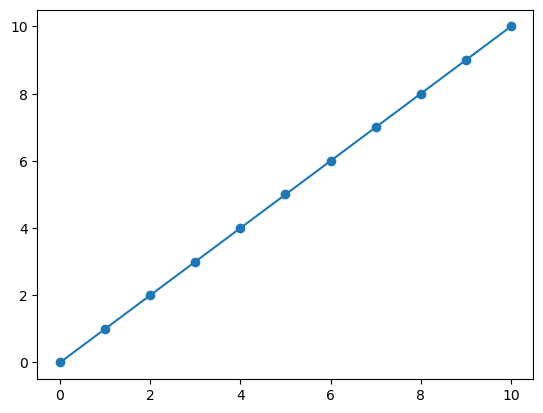

In [31]:
x=range(0,11)
y=range(0,11)
plt.scatter(x,y)
plt.plot(x,y)

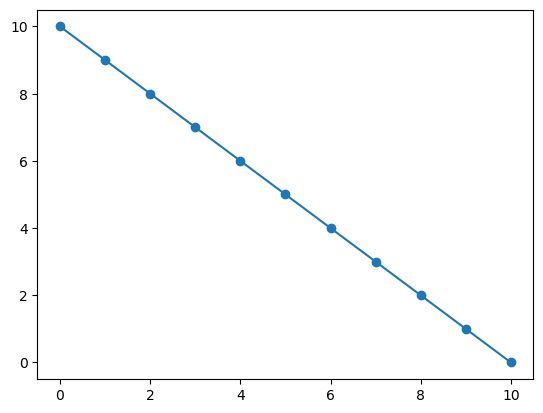

In [32]:
x=range(0,11)    # 0 to 10
y=range(10,-1,-1)   # 10 to 1-+1=0
plt.scatter(x,y)
plt.plot(x,y)

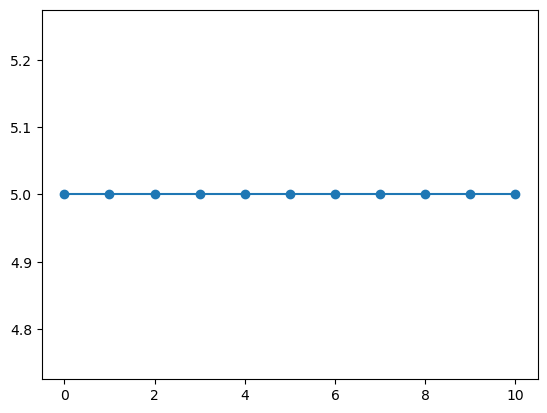

In [33]:
x=range(0,11)
y=[5 for i in range(0,11)]
plt.scatter(x,y)
plt.plot(x,y)

In [34]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [35]:
num

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [36]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


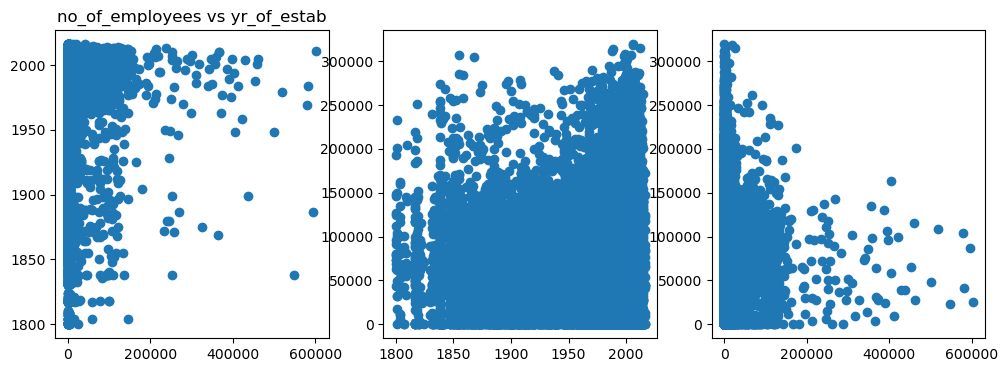

In [37]:
col1= visa_df['no_of_employees']
col2= visa_df['yr_of_estab']
col3= visa_df['prevailing_wage']
plt.figure(figsize=(12,4))
plt.subplot(1,3,1).scatter(col1,col2)
plt.title('no_of_employees vs yr_of_estab')
plt.subplot(1,3,2).scatter(col2,col3)
plt.subplot(1,3,3).scatter(col1,col3)

In [38]:
file_path=r'C:\Users\chinn\Documents\Data_files\winequality.csv'
winequality_df=pd.read_csv(file_path)

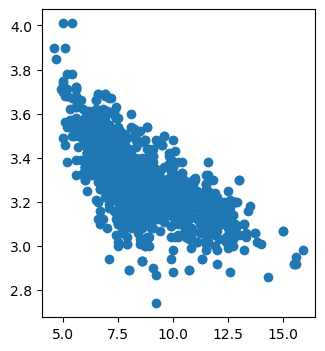

In [39]:
col1=winequality_df['fixed acidity']
col9=winequality_df['pH']
plt.figure(figsize=(12,4))
plt.subplot(1,3,1).scatter(col1,col9)

**Heat map**

- Any matrix values we can visualize using a heat map

- heat map will provide colors for different valies

- heat map also provides colors bar wich indicates, the color and its value

- for example the values ranges from 0.8 to 1 display as **blue color**

- so we need to check values , so we can see directly the blue color

- so immediately we can sence blue color means highest values which is 0.8 to 1

- heat map vailable in **sea born**

<Axes: >

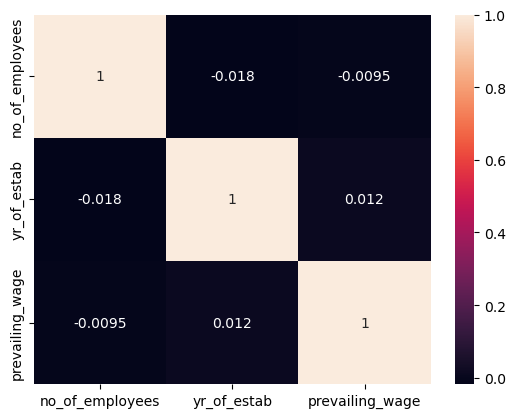

In [40]:
visa_corr=visa_df.corr(numeric_only=True)
sns.heatmap(visa_corr,annot=True)

<Axes: >

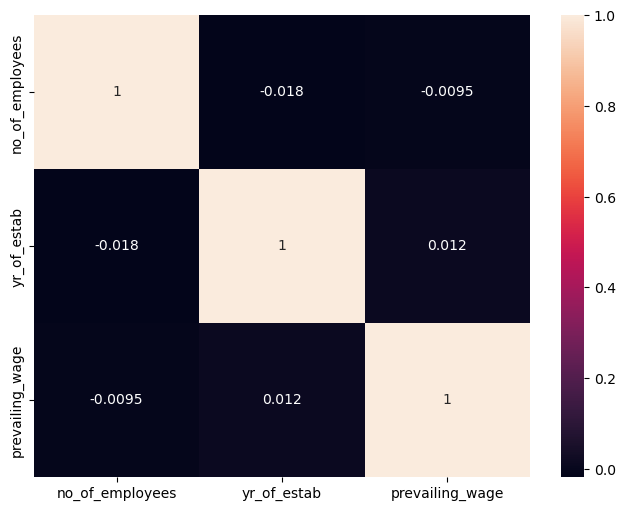

In [41]:
winequality_df_corr=visa_df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(visa_corr,annot=True)

In [42]:
winequality_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

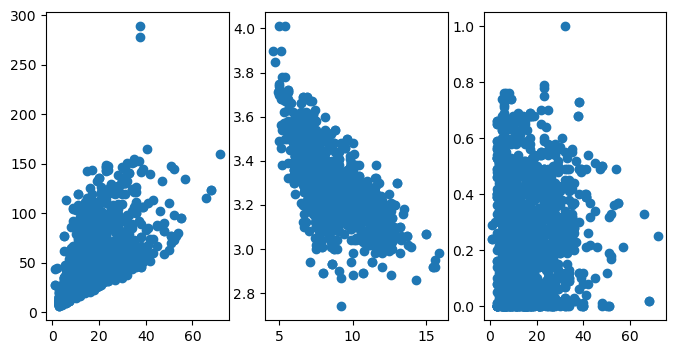

In [43]:
col1=winequality_df['free sulfur dioxide']
col2=winequality_df['total sulfur dioxide']
col3=winequality_df['fixed acidity']
col4=winequality_df['pH']
col5=winequality_df['citric acid']
plt.figure(figsize=(8,4))
plt.subplot(1,3,1).scatter(col1,col2)
plt.subplot(1,3,2).scatter(col3,col4)
plt.subplot(1,3,3).scatter(col1,col5)